Install all needed packages (will take some time if done first time).   
If you use moniconda open minicoda terminal, activate the environment you are using with Jupyter Notebook (e.g ```conda activate base```) and then:  
```conda install folium```  
```conda install pandas```     
```conda install matplotlib```   
```conda install -c conda-forge osmnx```  

And then restart the kernel.

In [1]:
import osmnx as ox

In [2]:
import pandas as pd               # a data.frame handler like R
import folium                     # displaying maps
import os
import matplotlib.pyplot as plt
import selenium

In [3]:
# read data
current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
df = pd.read_table(current_file + os.sep + 'data' + os.sep + 'trafficCounts.csv', sep =';')  # os.sep as os inedpendent sep
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619664 entries, 0 to 1619663
Data columns (total 34 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ZST_NR          1619664 non-null  int64 
 1   SiteCode        1619664 non-null  int64 
 2   SiteName        1619664 non-null  object
 3   DateTimeFrom    1619664 non-null  object
 4   DateTimeTo      1619664 non-null  object
 5   DirectionName   1619664 non-null  object
 6   LaneCode        1619664 non-null  int64 
 7   LaneName        1619664 non-null  object
 8   ValuesApproved  1619664 non-null  int64 
 9   ValuesEdited    1619664 non-null  int64 
 10  TrafficType     1619664 non-null  object
 11  Total           1619664 non-null  int64 
 12  MR              1619664 non-null  int64 
 13  PW              1619664 non-null  int64 
 14  PW+             1619664 non-null  int64 
 15  Lief            1619664 non-null  int64 
 16  Lief+           1619664 non-null  int64 
 17  Lief+Auf

In [4]:
df.head()
#df.columns

,ZST_NR,SiteCode,SiteName,DateTimeFrom,DateTimeTo,DirectionName,LaneCode,LaneName,ValuesApproved,ValuesEdited,...,Month,Day,Weekday,HourFrom,Date,TimeFrom,TimeTo,DayOfYear,Zst_id,Geo Point
0,235,235,"235 A3-A35, Grenze CH-F",2019-01-01T00:00:00+01:00,2019-01-01T01:00:00+01:00,von Frankreich,1,Spur 1,1,0,...,1,1,1,0,01.01.2019,00:00,01:00,1,235,"47.5751385212,7.56315796773"
1,235,235,"235 A3-A35, Grenze CH-F",2019-01-01T01:00:00+01:00,2019-01-01T02:00:00+01:00,von Frankreich,1,Spur 1,1,0,...,1,1,1,1,01.01.2019,01:00,02:00,1,235,"47.5751385212,7.56315796773"
2,235,235,"235 A3-A35, Grenze CH-F",2019-01-01T02:00:00+01:00,2019-01-01T03:00:00+01:00,von Frankreich,1,Spur 1,1,0,...,1,1,1,2,01.01.2019,02:00,03:00,1,235,"47.5751385212,7.56315796773"
3,235,235,"235 A3-A35, Grenze CH-F",2019-01-01T03:00:00+01:00,2019-01-01T04:00:00+01:00,von Frankreich,1,Spur 1,1,0,...,1,1,1,3,01.01.2019,03:00,04:00,1,235,"47.5751385212,7.56315796773"
4,235,235,"235 A3-A35, Grenze CH-F",2019-01-01T04:00:00+01:00,2019-01-01T05:00:00+01:00,von Frankreich,1,Spur 1,1,0,...,1,1,1,4,01.01.2019,04:00,05:00,1,235,"47.5751385212,7.56315796773"


In [6]:
f[['lat','lng']] = f['Geo Point'].str.split(',', expand=True)

NameError: name 'f' is not defined

In [4]:
tmp = df[df['DateTimeFrom'] == '2019-01-01T00:00:00+01:00']
len(tmp) # number of rows
tmp['SiteCode'].unique()
tmp = tmp[tmp['SiteCode'] < 1000]  # siteCode are integers, to use string length, .str.len()
agg = tmp.groupby('SiteCode').PW.agg('sum')   # aggregate PW
f = pd.merge(agg, tmp[['SiteCode','Geo Point']], how='inner',on='SiteCode')
f['SiteCode'].unique().tolist()  # list of unique entries in col SiteCode
# split Geo Point in lng an lat
f[['lat','lng']] = f['Geo Point'].str.split(',', expand=True) # split Geo Points into new cols
# for calculation circles
maxPW = f['PW'].max()
minPW = f['PW'].min()
meanPW = f['PW'].mean()


In [ ]:
place_name = 'Basel, Switzerland'
graph = ox.graph_from_place(place_name)

In [7]:
def plotDot(row):
    radius = row.PW / maxPW * 10
    folium.CircleMarker(location=[row.lat, row.lng],radius=radius,color = '#f44336',fill=True, fillcolor = '#f44336', fill_opacity =1).add_to(m)

# the map
nodes, streets = ox.graph_to_gdfs(graph)
#streets.head()
style = {'color': '#F7DC6F', 'weight':'1'}
m = folium.Map([47.561195,7.581742], width=900, height =650,zoom_start=14, tiles='CartoDB Positron')
# plot points
f.apply(plotDot, axis = 1)
m

from selenium import webdriver
import time

mapFname = 'output.html'
m.save(mapFname)

mapUrl = 'file://{0}/{1}'.format(os.getcwd(), mapFname)

# download gecko driver for firefox from here - https://github.com/mozilla/geckodriver/releases

# use selenium to save the html as png image
driver = webdriver.Firefox()
driver.get(mapUrl)
# wait for 5 seconds for the maps and other assets to be loaded in the browser
time.sleep(5)
driver.save_screenshot('output.png')
driver.quit()

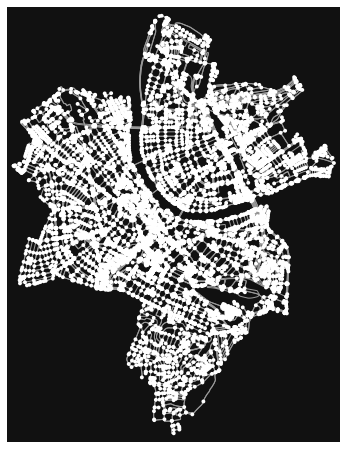

In [28]:
fig, ax = ox.plot_graph(graph)